In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from sklearn.metrics import mean_squared_error
import plotly.express as px

In [126]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [127]:
glob.glob('/content/drive/My Drive/portfolio_dataset/project_2/S&P_resources/individual_stocks_5yr/*csv')

['/content/drive/My Drive/portfolio_dataset/project_2/S&P_resources/individual_stocks_5yr/AAPL_data.csv',
 '/content/drive/My Drive/portfolio_dataset/project_2/S&P_resources/individual_stocks_5yr/ACN_data.csv',
 '/content/drive/My Drive/portfolio_dataset/project_2/S&P_resources/individual_stocks_5yr/ADP_data.csv',
 '/content/drive/My Drive/portfolio_dataset/project_2/S&P_resources/individual_stocks_5yr/ADS_data.csv',
 '/content/drive/My Drive/portfolio_dataset/project_2/S&P_resources/individual_stocks_5yr/ADI_data.csv',
 '/content/drive/My Drive/portfolio_dataset/project_2/S&P_resources/individual_stocks_5yr/AEE_data.csv',
 '/content/drive/My Drive/portfolio_dataset/project_2/S&P_resources/individual_stocks_5yr/ADBE_data.csv',
 '/content/drive/My Drive/portfolio_dataset/project_2/S&P_resources/individual_stocks_5yr/ABT_data.csv',
 '/content/drive/My Drive/portfolio_dataset/project_2/S&P_resources/individual_stocks_5yr/ADSK_data.csv',
 '/content/drive/My Drive/portfolio_dataset/project_

In [128]:
len(glob.glob('/content/drive/My Drive/portfolio_dataset/project_2/S&P_resources/individual_stocks_5yr/*csv'))

505

There are 505 companies in my scope, but I plan to focus on specific ones to streamline my efforts and maximize impact.

In [129]:
company_list = [
    '/content/drive/My Drive/portfolio_dataset/project_2/S&P_resources/individual_stocks_5yr/AAPL_data.csv',
    '/content/drive/My Drive/portfolio_dataset/project_2/S&P_resources/individual_stocks_5yr/AMZN_data.csv',
    '/content/drive/My Drive/portfolio_dataset/project_2/S&P_resources/individual_stocks_5yr/GOOG_data.csv',
    '/content/drive/My Drive/portfolio_dataset/project_2/S&P_resources/individual_stocks_5yr/MSFT_data.csv',
]

In [130]:
# Initialize an empty list to temporarily store DataFrames
dfs = []

# Iterate through the list of CSV files
for file in company_list:
    try:
        # Read the current CSV file, handling encoding issues and skipping problematic lines
        current_df = pd.read_csv(file, encoding='utf-8', on_bad_lines='skip')
        dfs.append(current_df)  # Append the DataFrame to the list
    except Exception as e:
        print(f"Error reading {file}: {e}")

# Combine all DataFrames into one using pd.concat
specific_companies_df = pd.concat(dfs, ignore_index=True)

# Display or further process the combined DataFrame
print(specific_companies_df)

            date     open     high      low    close     volume  Name
0     2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1     2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2     2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
3     2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL
4     2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL
...          ...      ...      ...      ...      ...        ...   ...
4747  2018-02-01  94.7900  96.0700  93.5813  94.2600   47227882  MSFT
4748  2018-02-02  93.6400  93.9700  91.5000  91.7800   47867753  MSFT
4749  2018-02-05  90.5600  93.2400  88.0000  88.0000   51031465  MSFT
4750  2018-02-06  86.8900  91.4750  85.2500  91.3300   67998564  MSFT
4751  2018-02-07  90.4900  91.7700  89.2000  89.6100   41107592  MSFT

[4752 rows x 7 columns]


In [131]:
specific_companies_df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [132]:
specific_companies_df['Name'].unique()

array(['AAPL', 'AMZN', 'GOOG', 'MSFT'], dtype=object)

In [133]:
specific_companies_df.isnull().sum()

,0
date,0
open,0
high,0
low,0
close,0
volume,0
Name,0


In [134]:
specific_companies_df.dtypes

,0
date,object
open,float64
high,float64
low,float64
close,float64
volume,int64
Name,object


In [135]:
specific_companies_df['date'] =  pd.to_datetime(specific_companies_df['date'])

In [136]:
specific_companies_df['date']

,date
0,2013-02-08
1,2013-02-11
2,2013-02-12
3,2013-02-13
4,2013-02-14
...,...
4747,2018-02-01
4748,2018-02-02
4749,2018-02-05
4750,2018-02-06


# **Stock price fluctuation**

I analyzed the stock price fluctuations by comparing the dates (X-axis) to the corresponding close prices (Y-axis). This approach allowed me to observe trends over time, identify peaks (highest close prices) and lows (lowest close prices), and understand the volatility of each company's stock within the dataset.

In [137]:
big_four_list = specific_companies_df['Name'].unique()

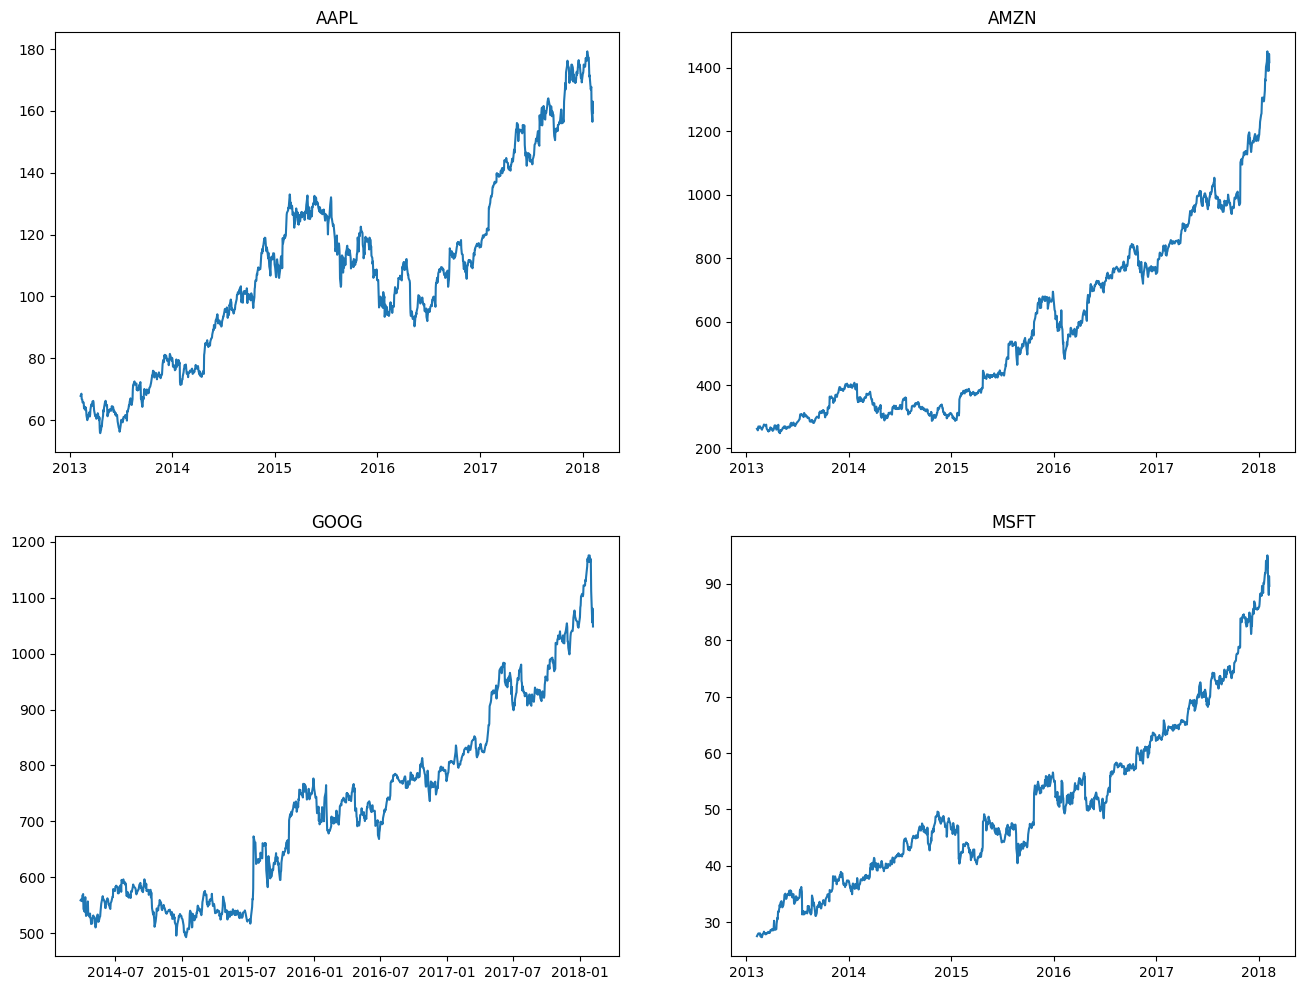

In [138]:
plt.figure(figsize=(16,12))
for index, company in enumerate(big_four_list, 1):
    plt.subplot(2, 2, index)  # Create a 2x2 grid of subplots and select the subplot corresponding to 'index'
    filter1 = specific_companies_df['Name'] == company  # Filter rows where the 'Name' column matches the current company
    df = specific_companies_df[filter1]  # Create a DataFrame for the current company
    plt.plot(df['date'], df['close'])  # Plot the 'close' prices against 'date' for the current company
    plt.title(company)  # Set the title of the subplot to the company name


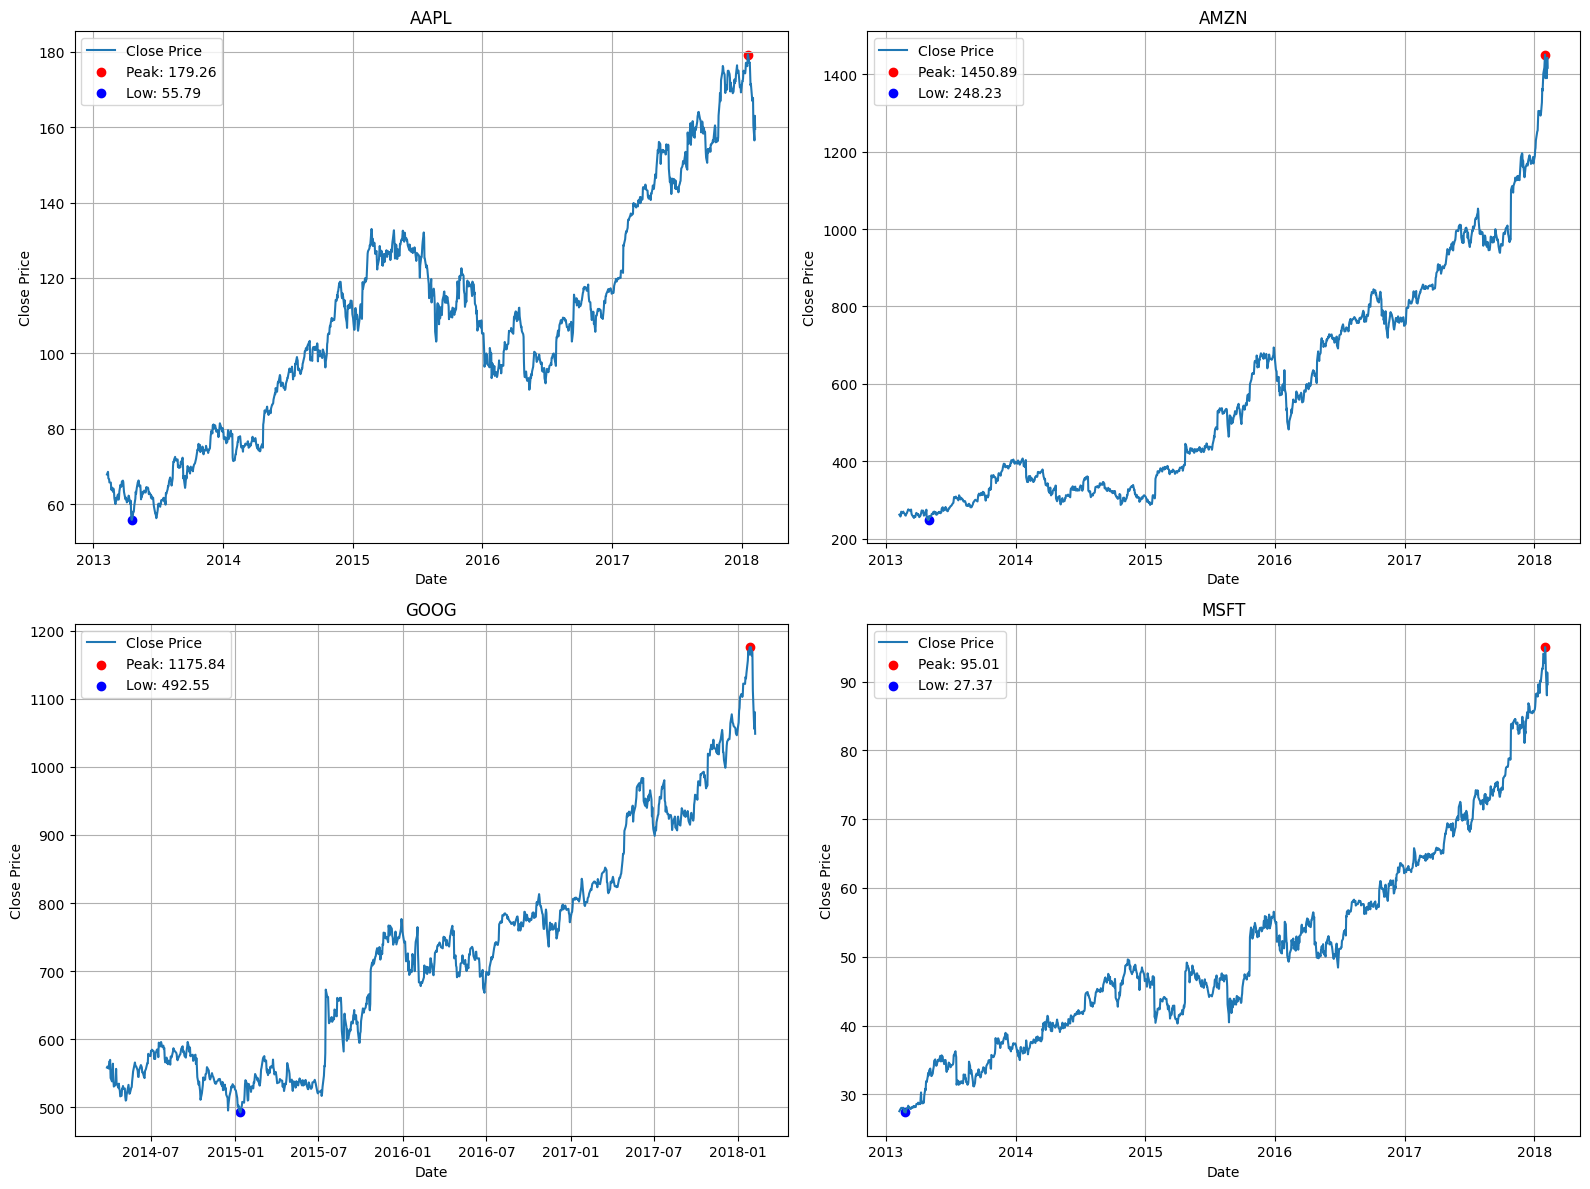

In [139]:
plt.figure(figsize=(16, 12))

for index, company in enumerate(big_four_list, 1):
    plt.subplot(2, 2, index)  # Create a 2x2 grid of subplots
    filter1 = specific_companies_df['Name'] == company  # Filter rows for the current company
    df = specific_companies_df[filter1]  # Create a DataFrame for the current company

    # Find peak and low points
    max_close = df['close'].max()
    min_close = df['close'].min()
    max_date = df[df['close'] == max_close]['date'].values[0]
    min_date = df[df['close'] == min_close]['date'].values[0]

    # Plot the 'close' prices against 'date'
    plt.plot(df['date'], df['close'], label='Close Price')

    # Mark peak and low points
    plt.scatter(max_date, max_close, color='red', label=f'Peak: {max_close:.2f}')
    plt.scatter(min_date, min_close, color='blue', label=f'Low: {min_close:.2f}')

    # Enhancements
    plt.grid(True)  # Add a grid
    plt.legend()  # Add a legend to distinguish peak and low points
    plt.title(company)  # Set the title of the subplot to the company name
    plt.xlabel('Date')  # Label for x-axis
    plt.ylabel('Close Price')  # Label for y-axis

plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

# **Moving Average of stocks**

A moving average is a way to smooth out data by taking the average of a specific number of recent values. It's like looking at a rolling "snapshot" of the data to see trends without being distracted by short-term ups and downs.

For example, if you calculate a 10-day moving average of stock prices, you take the average of the last 10 days, then move one day forward, and calculate the average of the next 10 days, and so on. This helps highlight the overall direction (up, down, or stable) while filtering out random fluctuations.

  Example:
  If you have daily stock prices [10, 12, 14, 16, 18, 20, 22, 24, 26, 28] and use a rolling(window=3).mean():

1. First 3 values: (10+12+14)/3 = 12
2. Slide one step forward: (12+14+16)/3 = 14
3. Continue sliding for the rest of the data.

  This results in a smoother trend line that highlights the overall direction while reducing the effect of short-term fluctuations.

The rolling(window=10) function in Python is a tool to calculate a moving average (or other metrics) over a rolling window of 10 values. Here's how it works:

- A rolling window is like a sliding frame that moves through the data. For each position of the frame, it includes the current value and the previous 9 values (if window=10).
- The moving average is calculated by taking the average of the numbers within that window.

In [140]:
specific_companies_df['close'].rolling(window=10).mean().head(20)

,close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,66.03251


In [141]:
specific_companies_copy_df = specific_companies_df.copy()

In [142]:
moving_average_day = [10, 20, 50]

for ma in moving_average_day:
 specific_companies_copy_df['close_'+str(ma)]= specific_companies_copy_df['close'].rolling(ma).mean()

In [143]:
specific_companies_copy_df.tail()

,date,open,high,low,close,volume,Name,close_10,close_20,close_50
4747,2018-02-01,94.79,96.070,93.5813,94.26,47227882,MSFT,92.765,90.6770,86.9978
4748,2018-02-02,93.64,93.970,91.5000,91.78,47867753,MSFT,92.943,90.9105,87.1828
4749,2018-02-05,90.56,93.240,88.0000,88.00,51031465,MSFT,92.582,90.9010,87.2684
4750,2018-02-06,86.89,91.475,85.2500,91.33,67998564,MSFT,92.525,91.0535,87.4328
4751,2018-02-07,90.49,91.770,89.2000,89.61,41107592,MSFT,92.304,91.1230,87.5598


In [144]:
 # Set 'date' column as the index for easier time-based operations
specific_companies_copy_df.set_index('date', inplace=True)

In [145]:
specific_companies_copy_df.columns

Index(['open', 'high', 'low', 'close', 'volume', 'Name', 'close_10',
       'close_20', 'close_50'],
      dtype='object')

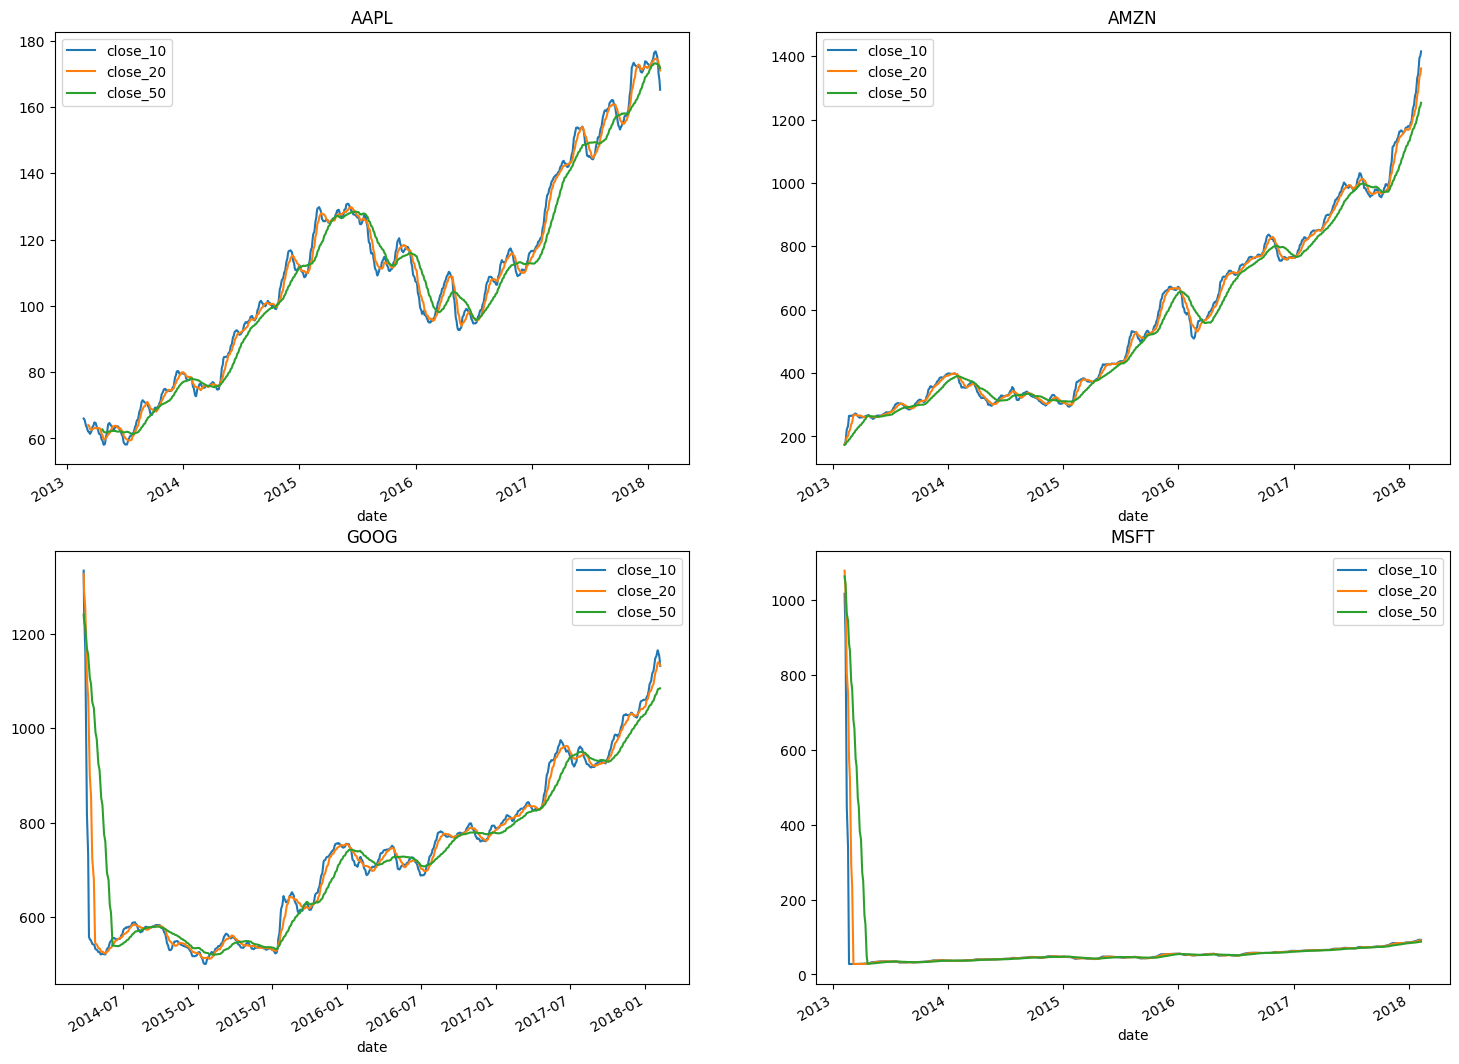

In [146]:
plt.figure(figsize=(18,14))
for index, company in enumerate(big_four_list, 1):
    plt.subplot(2, 2, index)
    filter1 = specific_companies_copy_df['Name'] == company
    df = specific_companies_copy_df[filter1]
    df[['close_10', 'close_20', 'close_50']].plot(ax=plt.gca())
    plt.title(company)

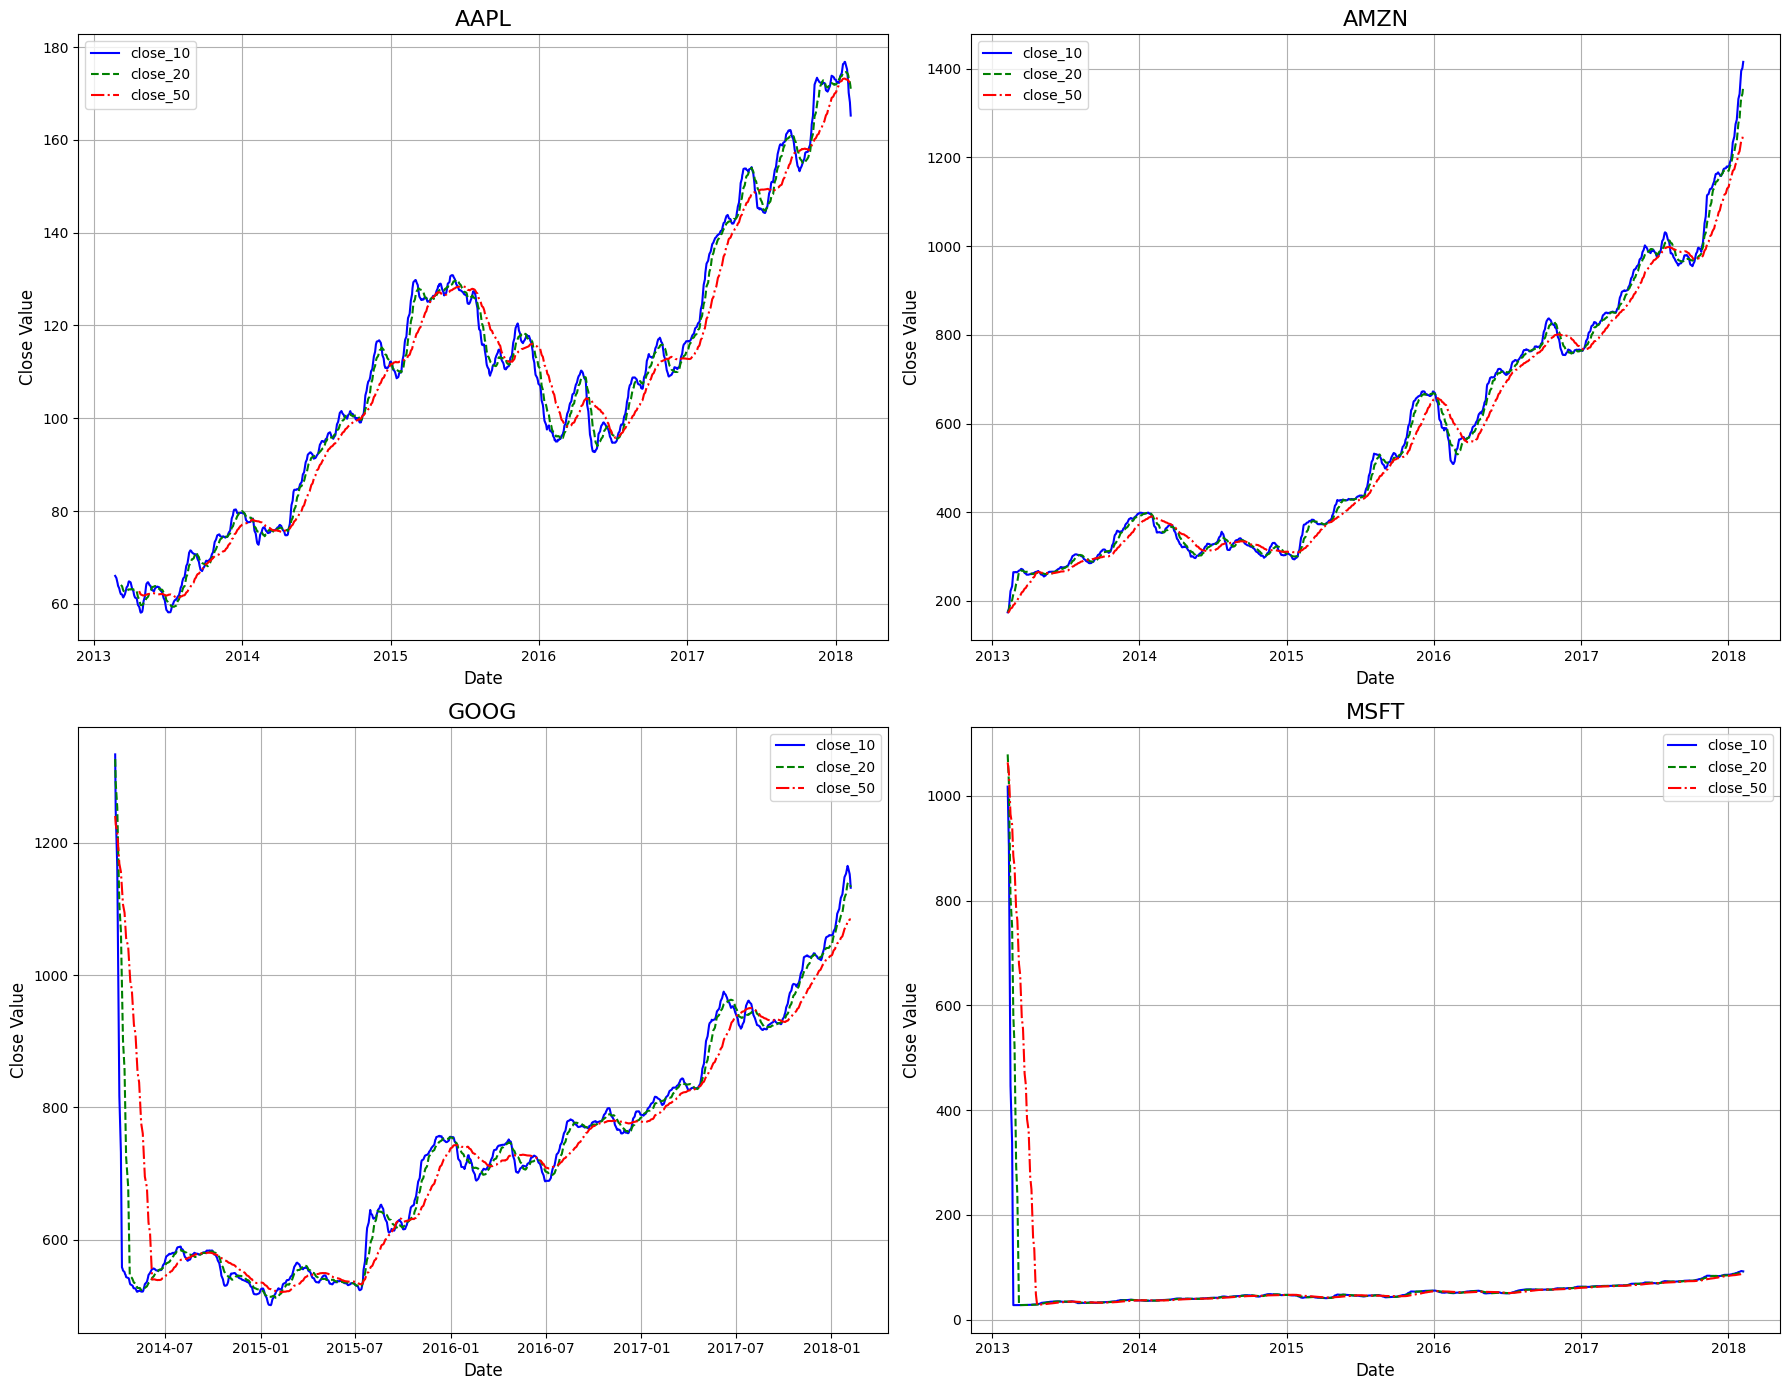

In [147]:
plt.figure(figsize=(18, 14))

# Define styles for better differentiation
styles = {'close_10': {'color': 'blue', 'linestyle': '-'},
          'close_20': {'color': 'green', 'linestyle': '--'},
          'close_50': {'color': 'red', 'linestyle': '-.'}}

for index, company in enumerate(big_four_list, 1):
    plt.subplot(2, 2, index)

    # Filter data for the current company
    filter1 = specific_companies_copy_df['Name'] == company
    df = specific_companies_copy_df[filter1]

    # Plot each interval with a specific style
    for col, style in styles.items():
        plt.plot(df.index, df[col], label=col, **style)

    # Add title and legend
    plt.title(company, fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Close Value', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True)

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

# **Stock Price Daily Percentage Variation**

In [148]:
AAPL_df = pd.read_csv('/content/drive/My Drive/portfolio_dataset/project_2/S&P_resources/individual_stocks_5yr/AAPL_data.csv')

In [149]:
AAPL_df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


Daily return percentage for (AAPL_df) and creates a new column called 'Daily return(in %)'. It uses the .pct_change() method to compute the percentage change between the closing prices of consecutive days, and multiplies the result by 100 to express it as a percentage. This helps in analyzing the stock's daily performance.

In [150]:
AAPL_df['Daily return(in %)'] = AAPL_df['close'].pct_change() * 100

In [151]:
AAPL_df.head()

,date,open,high,low,close,volume,Name,Daily return(in %)
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,-0.089934


In [152]:
px.line(AAPL_df, x='date', y='Daily return(in %)')

# **Resampling analysis of Closing Price**

In [153]:
AAPL_df.dtypes

,0
date,object
open,float64
high,float64
low,float64
close,float64
volume,int64
Name,object
Daily return(in %),float64


In [154]:
AAPL_df['date'] = pd.to_datetime(AAPL_df['date'])

In [155]:
AAPL_df.dtypes

,0
date,datetime64[ns]
open,float64
high,float64
low,float64
close,float64
volume,int64
Name,object
Daily return(in %),float64


In [156]:
AAPL_df.set_index('date', inplace=True)

In [157]:
AAPL_df.head()

,open,high,low,close,volume,Name,Daily return(in %)
date,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,-0.089934


In [158]:
# Resample the 'close' column to get the monthly mean values at the end of each month ('ME' stands for Month-End)
AAPL_df['close'].resample('ME').mean()

,close
date,
2013-02-28,65.306264
2013-03-31,63.120110
2013-04-30,59.966432
2013-05-31,63.778927
2013-06-30,60.791120
...,...
2017-10-31,157.817273
2017-11-30,172.406190
2017-12-31,171.891500


<Axes: xlabel='date'>

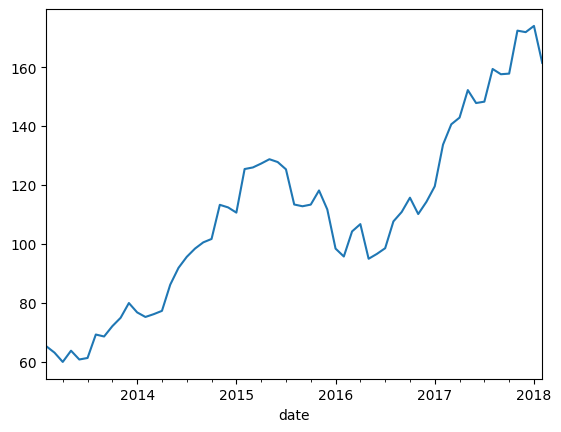

In [159]:
AAPL_df['close'].resample('ME').mean().plot()

In [160]:
# Resample the 'close' column to get the yearly mean values at the end of each year ('YE' stands for Year-End)
AAPL_df['close'].resample('YE').mean()

,close
date,
2013-12-31,67.237839
2014-12-31,92.264531
2015-12-31,120.039861
2016-12-31,104.604008
2017-12-31,150.585080
2018-12-31,171.594231


<Axes: xlabel='date'>

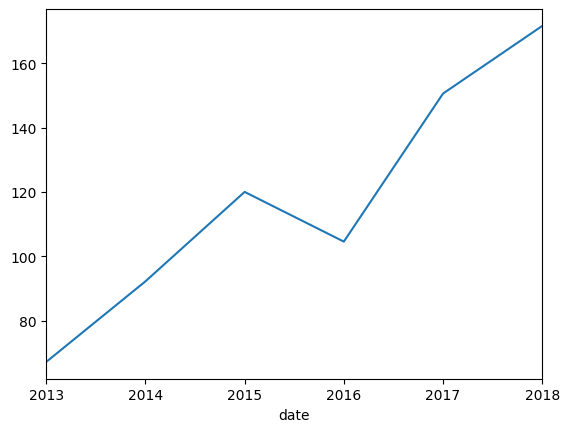

In [161]:
AAPL_df['close'].resample('YE').mean().plot()

In [162]:
AAPL_df['close'].resample('QE').mean()

,close
date,
2013-03-31,64.020291
2013-06-30,61.534692
2013-09-30,66.320670
2013-12-31,75.567478
2014-03-31,76.086293
2014-06-30,85.117475
2014-09-30,98.163311
2014-12-31,108.821016
2015-03-31,120.776721


<Axes: xlabel='date'>

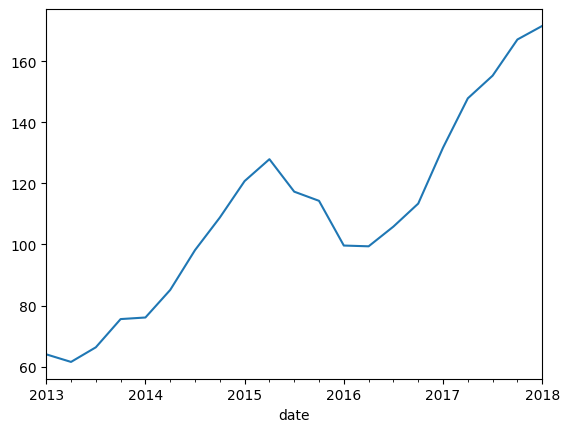

In [163]:
AAPL_df['close'].resample('QE').mean().plot()

<ipython-input-164-d830d49bf5ce>:2: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

<ipython-input-164-d830d49bf5ce>:3: FutureWarning:

'Q' is deprecated and will be removed in a future version, please use 'QE' instead.

<ipython-input-164-d830d49bf5ce>:4: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.



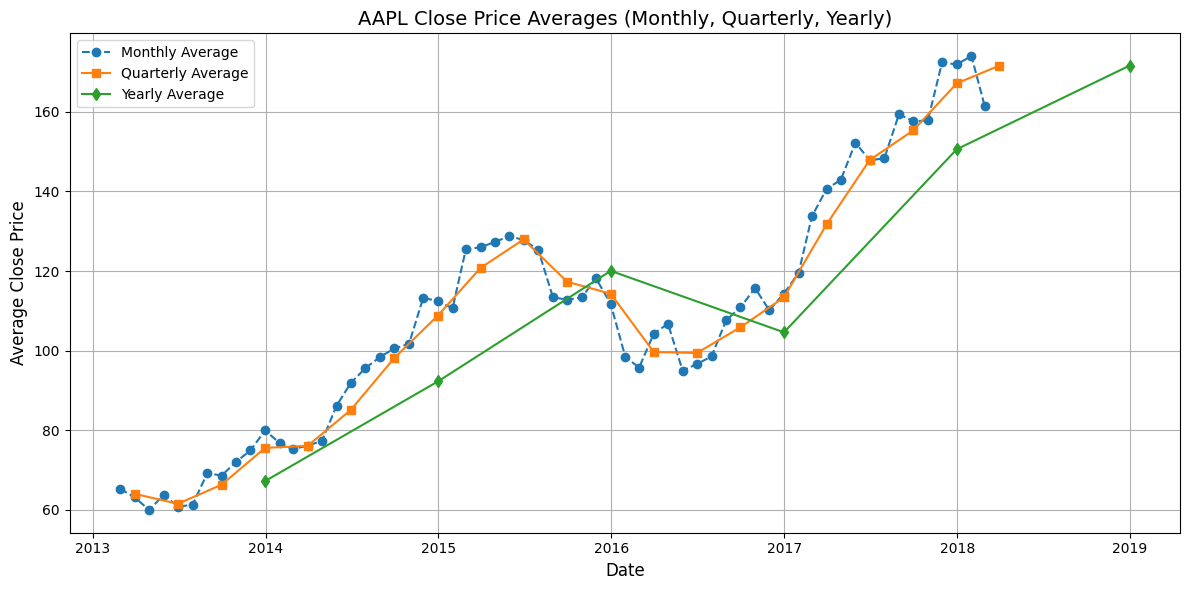

In [164]:
# Resample and calculate means
monthly_avg = AAPL_df['close'].resample('M').mean()
quarterly_avg = AAPL_df['close'].resample('Q').mean()
yearly_avg = AAPL_df['close'].resample('Y').mean()

# Plot each with labels
plt.figure(figsize=(12, 6))

plt.plot(monthly_avg, label='Monthly Average', linestyle='--', marker='o')
plt.plot(quarterly_avg, label='Quarterly Average', linestyle='-', marker='s')
plt.plot(yearly_avg, label='Yearly Average', linestyle='-', marker='d')

# Add title, labels, and legend
plt.title('AAPL Close Price Averages (Monthly, Quarterly, Yearly)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Close Price', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

# **Closing price correlation**

In [165]:
company_list

['/content/drive/My Drive/portfolio_dataset/project_2/S&P_resources/individual_stocks_5yr/AAPL_data.csv',
 '/content/drive/My Drive/portfolio_dataset/project_2/S&P_resources/individual_stocks_5yr/AMZN_data.csv',
 '/content/drive/My Drive/portfolio_dataset/project_2/S&P_resources/individual_stocks_5yr/GOOG_data.csv',
 '/content/drive/My Drive/portfolio_dataset/project_2/S&P_resources/individual_stocks_5yr/MSFT_data.csv']

In [166]:
AAPL = pd.read_csv(company_list[0])
AMZN = pd.read_csv(company_list[1])
GOOG = pd.read_csv(company_list[2])
MSFT = pd.read_csv(company_list[3])

In [167]:
closing_price_df = pd.DataFrame()

In [168]:
closing_price_df['AAPL_close'] = AAPL['close']
closing_price_df['AMZN_close'] = AMZN['close']
closing_price_df['GOOG_close'] = GOOG['close']
closing_price_df['MSFT_close'] = MSFT['close']

In [169]:
closing_price_df.head()

,AAPL_close,AMZN_close,GOOG_close,MSFT_close
0,67.8542,261.95,558.46,27.55
1,68.5614,257.21,559.99,27.86
2,66.8428,258.70,556.97,27.88
3,66.7156,269.47,567.16,28.03
4,66.6556,269.24,567.00,28.04


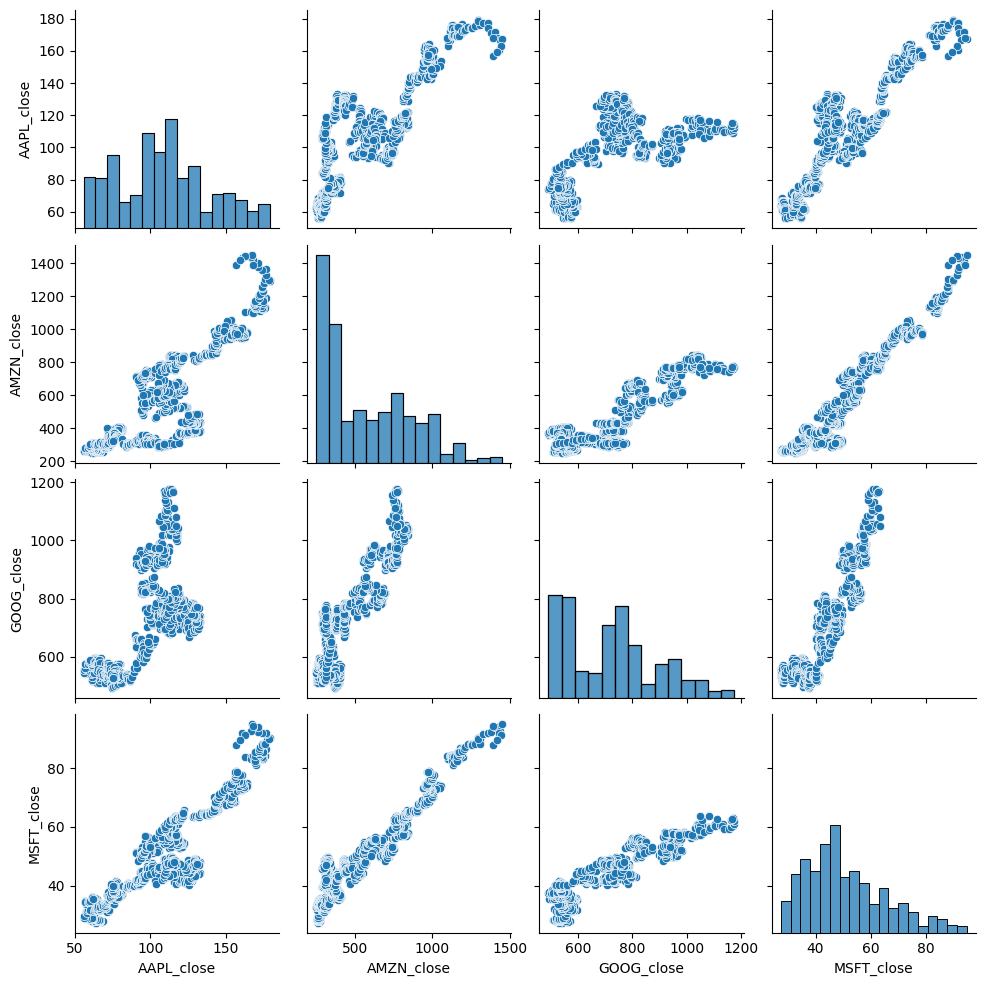

In [170]:
sns.pairplot(closing_price_df)

In [171]:
closing_price_df.corr()

,AAPL_close,AMZN_close,GOOG_close,MSFT_close
AAPL_close,1.000000,0.819078,0.640522,0.899689
AMZN_close,0.819078,1.000000,0.888456,0.955977
GOOG_close,0.640522,0.888456,1.000000,0.907011
MSFT_close,0.899689,0.955977,0.907011,1.000000


<Axes: >

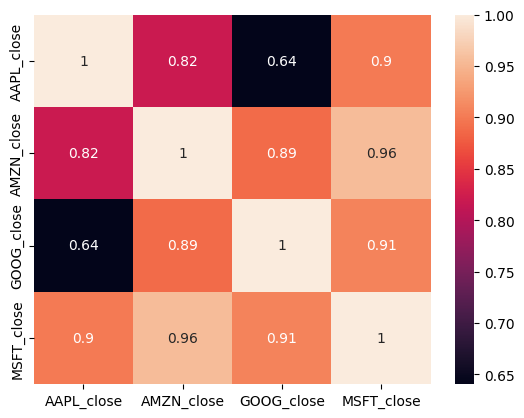

In [172]:
sns.heatmap(closing_price_df.corr(), annot=True)

## **bold text**

In [173]:
closing_price_df['AAPL_close']

,AAPL_close
0,67.8542
1,68.5614
2,66.8428
3,66.7156
4,66.6556
...,...
1254,167.7800
1255,160.5000
1256,156.4900
1257,163.0300


In [174]:
closing_price_df['AAPL_close'].shift(1)

,AAPL_close
0,NaN
1,67.8542
2,68.5614
3,66.8428
4,66.7156
...,...
1254,167.4300
1255,167.7800
1256,160.5000
1257,156.4900


In [175]:
(closing_price_df['AAPL_close'] - closing_price_df['AAPL_close'].shift(1)) / closing_price_df['AAPL_close'].shift(1) * 100

,AAPL_close
0,NaN
1,1.042235
2,-2.506658
3,-0.190297
4,-0.089934
...,...
1254,0.209043
1255,-4.339015
1256,-2.498442
1257,4.179181


In [176]:
for col in closing_price_df.columns:
  closing_price_df[col +'_pct_change'] = (closing_price_df[col] - closing_price_df[col].shift(1)) / closing_price_df[col].shift(1) * 100

In [177]:
closing_price_df.head()

,AAPL_close,AMZN_close,GOOG_close,MSFT_close,AAPL_close_pct_change,AMZN_close_pct_change,GOOG_close_pct_change,MSFT_close_pct_change
0,67.8542,261.95,558.46,27.55,NaN,NaN,NaN,NaN
1,68.5614,257.21,559.99,27.86,1.042235,-1.809506,0.273968,1.125227
2,66.8428,258.70,556.97,27.88,-2.506658,0.579293,-0.539295,0.071788
3,66.7156,269.47,567.16,28.03,-0.190297,4.163123,1.829542,0.538020
4,66.6556,269.24,567.00,28.04,-0.089934,-0.085353,-0.028211,0.035676


In [178]:
closing_price_df.columns

Index(['AAPL_close', 'AMZN_close', 'GOOG_close', 'MSFT_close',
       'AAPL_close_pct_change', 'AMZN_close_pct_change',
       'GOOG_close_pct_change', 'MSFT_close_pct_change'],
      dtype='object')

In [180]:
closing_price_percentage_df = closing_price_df[['AAPL_close_pct_change', 'AMZN_close_pct_change',
       'GOOG_close_pct_change', 'MSFT_close_pct_change']]

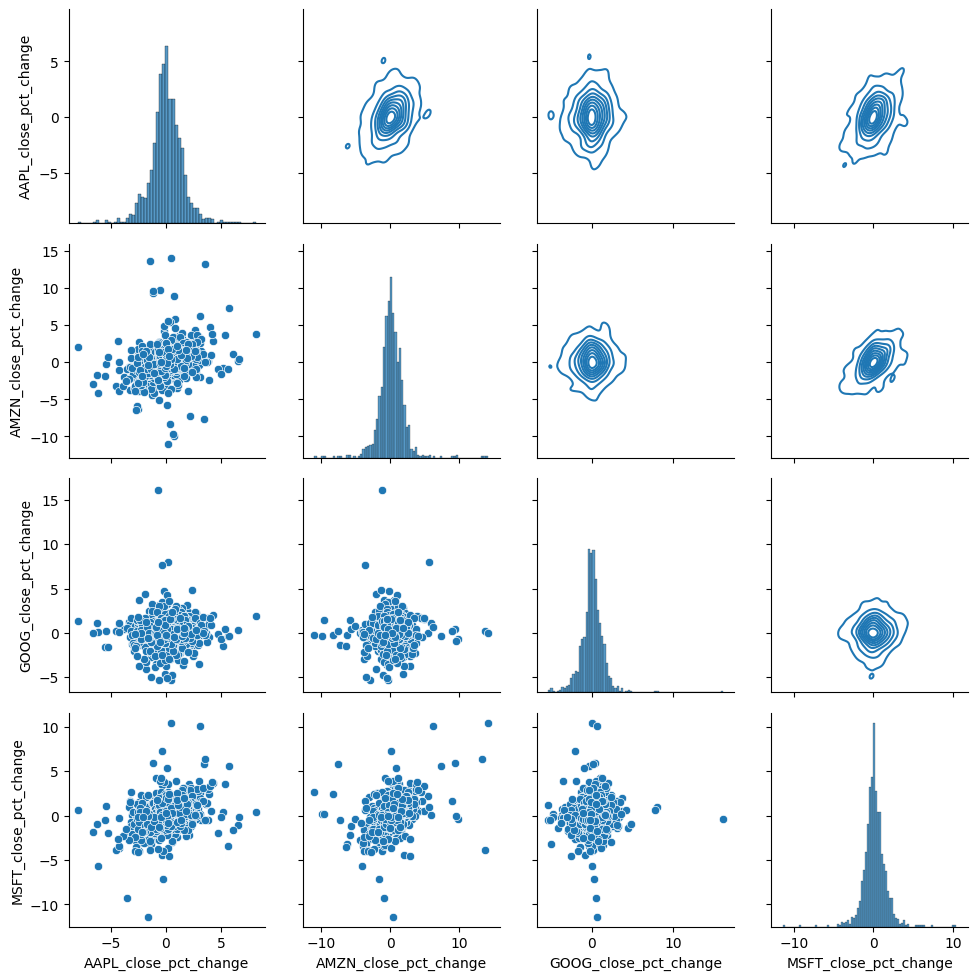

In [181]:
g =sns.PairGrid(data=closing_price_percentage_df)
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot)

In [182]:
closing_price_percentage_df.corr()

,AAPL_close_pct_change,AMZN_close_pct_change,GOOG_close_pct_change,MSFT_close_pct_change
AAPL_close_pct_change,1.000000,0.287659,0.036202,0.366598
AMZN_close_pct_change,0.287659,1.000000,0.027698,0.402678
GOOG_close_pct_change,0.036202,0.027698,1.000000,0.038939
MSFT_close_pct_change,0.366598,0.402678,0.038939,1.000000
